# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
# importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv("crime_data.csv")
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.drop(['Unnamed: 0'],axis = 1,inplace= True)

In [4]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
crime.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
crime.isnull()

,Murder,Assault,UrbanPop,Rape
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [9]:
crime.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(crime)

In [11]:
scaled_Univ_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [12]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=0)

In [15]:
crime["Cluster"] = kmeans.predict(scaled_Univ_df)

In [16]:
crime

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


Elbow Curve

In [17]:
kmeans.inertia_ #Within a cluster sum 0f square

57.55425863091104

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\Users\rupak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.520265525350695,
 43.927464044975736,
 40.521834611319754,
 34.6873883978491,
 32.70648136388184,
 28.311639397122555]

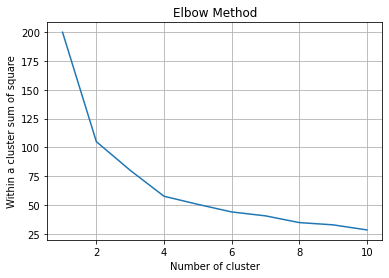

In [20]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within a cluster sum of square")
plt.grid()

In [21]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(scaled_Univ_df)
model.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [22]:
x=pd.Series(model.labels_)
crime['Clust']=x

In [23]:
crime.head(2)

,Murder,Assault,UrbanPop,Rape,Cluster,Clust
0,13.2,236,58,21.2,3,2
1,10.0,263,48,44.5,1,1


In [24]:
crime.iloc[:,1:5].groupby(crime.Clust).mean()

,Assault,UrbanPop,Rape,Cluster
Clust,,,,
0,78.538462,52.076923,12.176923,2.0
1,257.384615,76.000000,33.192308,1.0
2,243.625000,53.750000,21.412500,3.0
3,138.875000,73.875000,18.781250,0.0
